In [31]:
import scanpy 

data=scanpy.read_h5ad("data/senescent/GSE175533_sceasy_hay.h5ad")

data.var_names

var_names=data.var_names.to_list()

var_names=[str(i)[2:-1] for i in var_names]


meta_data=data.obs

cell_id=meta_data.index.to_list()

cell_id=[str(i)[2:-1].replace("-",".") for i in cell_id]

meta_data.index=cell_id

meta_data

,nCount_RNA,nFeature_RNA,barcode,PDL,sample,exp,S.Score,G2M.Score,Phase,nCount_SCT,nFeature_SCT
AAACGGGAGAGAACAG.1,34927.0,5474,b'AAACGGGAGAGAACAG-1',b'PDL_25',b'1',b'WT',0.541781,0.209151,b'S',35623.0,5474
AAACGGGGTTTAAGCC.1,35166.0,5426,b'AAACGGGGTTTAAGCC-1',b'PDL_25',b'1',b'WT',0.404641,0.513172,b'G2M',35723.0,5426
AAACGGGTCCTCATTA.1,36444.0,5749,b'AAACGGGTCCTCATTA-1',b'PDL_25',b'1',b'WT',-0.009645,0.473208,b'G2M',36291.0,5748
AAACGGGTCTAAGCCA.1,67652.0,6885,b'AAACGGGTCTAAGCCA-1',b'PDL_25',b'1',b'WT',-0.272565,-0.505199,b'G1',37575.0,6022
AAACGGGTCTGAGGGA.1,7680.0,1920,b'AAACGGGTCTGAGGGA-1',b'PDL_25',b'1',b'WT',0.347032,0.027671,b'S',32182.0,4066
...,...,...,...,...,...,...,...,...,...,...,...
TTTGCGCAGGCTCATT.16,19265.0,3947,b'TTTGCGCAGGCTCATT-16',b'htert_7',b'16',b'tert',0.244858,-0.206021,b'S',34455.0,4143
TTTGCGCGTGACCAAG.16,25148.0,4123,b'TTTGCGCGTGACCAAG-16',b'htert_7',b'16',b'tert',-0.163569,-0.256886,b'G1',34817.0,4137
TTTGCGCGTTAAGATG.16,32849.0,5274,b'TTTGCGCGTTAAGATG-16',b'htert_7',b'16',b'tert',0.482551,0.123422,b'S',35182.0,5274
TTTGGTTTCTGAAAGA.16,64737.0,7046,b'TTTGGTTTCTGAAAGA-16',b'htert_7',b'16',b'tert',-0.094765,0.148554,b'G2M',37665.0,6365


In [14]:
Phase=meta_data["barcode"]

Phase=Phase.to_list()

Phase=[str(i)[2:-1].replace("-",".") for i in Phase]

meta_data["barcode"]=Phase



Phase=meta_data["exp"]

Phase=Phase.to_list()

Phase=[str(i)[2:-1] for i in Phase]

meta_data["exp"]=Phase



Phase=meta_data["Phase"]

Phase=Phase.to_list()

Phase=[str(i)[2:-1] for i in Phase]

meta_data["Phase"]=Phase



PDL=meta_data["PDL"]

PDL=PDL.to_list()

PDL=[str(i)[2:-1] for i in PDL]

meta_data["PDL"]=PDL





In [15]:
phase=meta_data["Phase"].to_list()

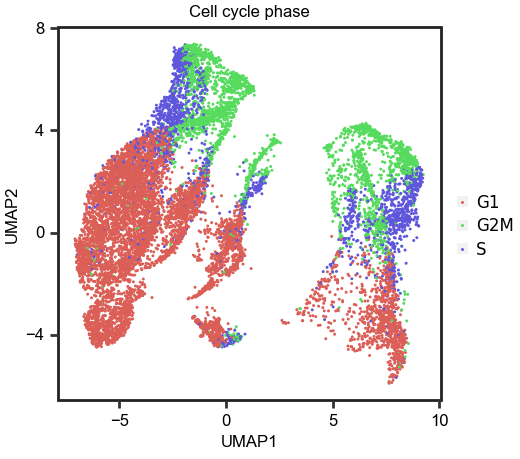

/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 2.6 x 2.3 in image.
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figure/senescence_phase_ground_truth.pdf


In [16]:
#umap of total dataset


from plotnine import *
import pandas as pd


black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
salmen = "#FA8072"
limegreen = '#32CD32'
deepskyblue = '#00AFEE'
c1="#F8766D"
c2="#00BA38"
c3="#619CFF"





embedding = data.obsm["X_umap"]

plot_data=pd.DataFrame(embedding,columns=["UMAP1","UMAP2"])

plot_data["phase"]=phase

#plot_data["score"]=score

p =(ggplot()
    + geom_point(plot_data, aes(x='UMAP1', y='UMAP2', color="phase"),size=0.001,stroke=0.3,alpha=1)
    #+ geom_point(data_not_indrop, aes(x='UMAP1', y='UMAP2',color="factor(Technology)"),size=0.001,alpha=1)
    +theme(
        figure_size=[2.6,2.3],
        axis_text=element_text(size=6,family="Arial",color="black"),
        axis_title_x=element_text(size=6,family="Arial",color="black"),
        axis_title_y=element_text(size=6,family="Arial",color="black"),
        plot_title=element_text(margin={'b': 1, 'r': 0, 'units': 'pt'},size=6,family="Arial",color="black",hjust=0.5),
        panel_background=element_rect(fill=gray, alpha=0),
        panel_grid_major=element_line(size=0.3, alpha=0.0,color=black),
        panel_grid_minor=element_line(size=0.3, alpha=0.0,color=black),
        panel_border=element_rect(color=black, size=1),
        legend_title = element_text(size=6,alpha=0), #change legend title font size
        legend_text = element_text(size=6),
        legend_background=element_rect(size=0.5,alpha=0),
        #legend_position=(0.75,0.9), 
        legend_direction='vertical',
        #legend_position='right',
        legend_key_size=4) #change legend text font size))
    #+scale_color_manual(values =[c1, c2, c3]) 
    #+geom_density_2d(colour = "#F8766D",size=0.2,data=data_U,alpha=0.5)
    #+geom_density_2d(colour = "#00BA38",size=0.2,data=data_psU,alpha=0.5)
    +ggtitle("Cell cycle phase")
    #+scale_color_gradient(low=deepskyblue , high=yellow,mid=c2)
    #+scale_color_gradient(low=purple , high="yellow",mid=c2)
    #+scale_color_manual(values=['#66C2A4', '#B2DF8A', '#2CA25F'])  
    #+scale_color_manual(values=['#bfff7f', '#ffff7f', '#ffbf7f'])  
   )
#+ facet_wrap('G')
print(p)
p.save('figure/senescence_phase_ground_truth.pdf')


In [ ]:
#cell cycle phase


In [17]:
import pandas as pd

data=pd.DataFrame(data.X.toarray(),columns=var_names)

data

,MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309.3,AL627309.2,AL627309.4,AL732372.1,OR4F29,AC114498.1,...,AC007325.2,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,AC213203.1,FAM231C
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
data_sparse=data


#statistics of cells expressing each gene
gene_expressed_cell_number=data_sparse.astype(bool).sum(axis=0)

print(len(gene_expressed_cell_number))
#filter gene expressed in less than 10 cells
gene_expressed_cell_number=gene_expressed_cell_number[gene_expressed_cell_number>4000]
print(len(gene_expressed_cell_number))

data_rm_sparse=data_sparse[gene_expressed_cell_number.index.tolist()]
data_rm_sparse.shape           #10k cells, 4487 genes

full_data=data_rm_sparse

33538
6800


In [19]:
base_dir="data/senescent"

In [20]:
import pickle
TF_gene_dict=pickle.load(open("human/TF_gene_dict","rb"))

len(TF_gene_dict)

1209

In [21]:
#generate gene_to_TF_transform_matrix
import numpy as np
import pickle

TF_gene_dict=pickle.load(open("human/TF_gene_dict","rb"))


gene_number=len(data_rm_sparse.columns.to_list())    

TF_number=len(TF_gene_dict)

gene_to_TF_transform_matrix=np.zeros((gene_number,TF_number))

TF_list=TF_gene_dict.keys()
for i,gene in enumerate(data_rm_sparse.columns):
    try:
        j=TF_list.index("gene")
        gene_to_TF_transform_matrix[i][j]=1
    except:
        pass
        
gene_to_TF_transform_matrix

pickle.dump(gene_to_TF_transform_matrix,open("%s/gene_to_TF_transform_matrix" %base_dir,"wb"))

In [22]:
#generate TF_mask

import numpy as np

gene_TF_dict=pickle.load(open("human/gene_TF_dict","rb"))

gene_number = len(data_rm_sparse.columns.to_list())    #6033
TF_number = len(TF_gene_dict)

TF_mask = np.zeros((gene_number,TF_number))
error_count=0

for i,gene_id in enumerate(data_rm_sparse.columns):

    for j,TF in enumerate(TF_gene_dict):
        if TF in gene_TF_dict.get(gene_id,[]):
            TF_mask[i][j]=1
        else:
            error_count+=1
        
print(error_count)
print(TF_mask)

pickle.dump(TF_mask,open("%s/TF_mask" %base_dir,"wb"))

5252906
[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [23]:
#generate GO_mask

GO_dict={}
with open("human/goa_human.gaf") as f:
    for line in f:
        if line[0] == "!":
            continue
        
        gene_id=line.split("\t")[2]
        GO_term=line.split("\t")[4]
        if GO_term not in GO_dict:
            GO_dict[GO_term]=[]
        GO_dict[GO_term].append(gene_id)


GO_list=[]
count=0
for item in GO_dict:
    if len(GO_dict[item])>=30:
        count+=1
        GO_list.append(item)
print(count)




print("Total GO number:",len(GO_list))




gene_dict={}
with open("human/goa_human.gaf") as f:
    for line in f:
        if line[0]=="!":
            continue
        gene_id=line.split("\t")[2].upper()
        GO_term=line.split("\t")[4]
        if gene_id not in gene_dict:
            gene_dict[gene_id]=[]
        gene_dict[gene_id].append(GO_term)



gene_number=len(data_rm_sparse.columns)    #6033
GO_number=len(GO_list)  

GO_mask=np.zeros((gene_number,GO_number))
error_count=0

for i,gene_id in enumerate(data_rm_sparse.columns):

    for j,GO_term in enumerate(GO_list):
        if GO_term in gene_dict.get(gene_id,"GO:default"):

            GO_mask[i][j]=1
        else:
            error_count+=1
        
print(error_count)

pickle.dump(GO_mask,open("%s/GO_mask" %base_dir,"wb"))


1946
Total GO number: 1946
13146694


In [24]:
#generate GO_TF_mask

TF_number=len(TF_gene_dict)
GO_number=len(GO_list) 

GO_TF_mask=np.zeros((TF_number,GO_number))
error_count=0

for i,TF in enumerate(TF_gene_dict):
    for j,GO in enumerate(GO_list):
        if GO in gene_dict.get(TF,"GO:default"):
            GO_TF_mask[i][j]=1
        else:
            error_count+=1
print(error_count)
        
GO_TF_mask

pickle.dump(GO_TF_mask,open("%s/GO_TF_mask" %base_dir,"wb"))

2332169


In [26]:
#GO_Net
import math
import time
import numpy as np
import pandas as pd
import pickle
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
from sklearn.model_selection import train_test_split as ts

data_rm_sparse=data_rm_sparse

data_rm_sparse.index=phase

###############################################################
gene_to_TF_transform_matrix=pickle.load(open("%s/gene_to_TF_transform_matrix" %base_dir,"rb"))
TF_mask=pickle.load(open("%s/TF_mask" %base_dir,"rb"))
GO_mask=pickle.load(open("%s/GO_mask" %base_dir,"rb"))
GO_TF_mask=pickle.load(open("%s/GO_TF_mask" %base_dir,"rb"))
###############################################################
#data_annotation = pd.read_csv('data/macparland/GSE115469_CellClusterType.txt', sep="\t")
#index_rename_dict = {key: value for key, value in zip(data_annotation['CellName'], data_annotation['CellType'])}
#$data_rm_sparse=data_rm_sparse.rename(index=index_rename_dict)

#normalize by row
#data_rm_sparse = data_rm_sparse.apply(lambda row: row / np.linalg.norm(row), axis=1)

#merge similar cell types
#data_rm_sparse.index = data_rm_sparse.index.str.replace('Hepatocyte_\d+', 'Hepatocyte', regex=True)
#data_rm_sparse.index = data_rm_sparse.index.str.replace('gamma-delta_T_Cells_\d+', 'gamma-delta_T_Cells', regex=True)


#filter low count cells
#data_rm_sparse = data_rm_sparse[data_rm_sparse.index != 'Hepatic_Stellate_Cells']


#novel_cell_type = ['Plasma_Cells']

#data_rm_sparse_novel = data_rm_sparse[data_rm_sparse.index.isin(novel_cell_type)]
#data_rm_sparse_rest = data_rm_sparse[~data_rm_sparse.index.isin(novel_cell_type)]




classes=[]
for celltype in data_rm_sparse.index:
    if celltype not in classes:
        classes.append(celltype)
#print(len(classes),classes)


label_dict_revese={}
label_dict={}
for i,celltype in enumerate(classes):
    label_dict[celltype]=i
    label_dict_revese[i]=celltype
label_dict
################################################################



def gen_mask(row,col,percent=0.5,num_zeros=None):
    if num_zeros is None:
        #Total number being masked is 0.5 by default
        num_zeros=int((row*col)*percent)
    
    mask=np.hstack([np.zeros(num_zeros),np.ones(row*col-num_zeros)])
    np.random.shuffle(mask)
    return mask.reshape(row,col)

class LinearFunction(torch.autograd.Function):
    """
    autograd function which masks it's weights by 'mask'.
    """
    
    #Not that both forward and backword are @staticmethod

    
    #bias, mask is an optional argument
    @staticmethod
    def forward(ctx, input, weight, bias=None, mask=None):
        if mask is not None:
            #change weight to 0 where mask == 0

            weight=weight*mask
 
        output=input.mm(weight.t())

        if bias is not None:
            output+=bias.unsqueeze(0).expand_as(output)
        
        ctx.save_for_backward(input, weight, bias, mask)

        return output
    
    #This function has noly a single output, so it gets only one gradient
    @staticmethod
    def backward(ctx,grad_output):
        input,weight,bias,mask = ctx.saved_tensors
        grad_input=grad_weight=grad_bias=grad_mask=None
        
        #These meeds_input_grad checks are optional and there only to improve efficiency.
        #If you want to make your code simpler, you can skip them. Returning gradients for
        #inputs that don't require it is not an error.
        if ctx.needs_input_grad[0]:
            grad_input=grad_output.mm(weight)
        
        if ctx.needs_input_grad[1]:
            grad_weight=grad_output.t().mm(input)
            
            if mask is not None:
                
                #change grad_weight to 0 where mask == 0
                grad_weight=grad_weight*mask

        
        #if bias is not None and ctx.need_input_grad[2]:
        if ctx.needs_input_grad[2]:
            grad_bias=grad_output.sum(0).squeeze(0)
        
        return grad_input,grad_weight,grad_bias,grad_mask
    

       
class CustomizedLinear(nn.Module):
    def __init__(self,input_features,output_features, bias=None, mask=None):
        """
        Arguments
        mask [numpy array]:
            The shape is (n_input_fearues,n_output_features).
            The elements are 0 or 1 which delcare un-connected or connected.
            
        bias [bool]:
            flg of bias.
        """
        super(CustomizedLinear,self).__init__()
        self.input_features=input_features
        self.out_features=output_features
        
        #nn.Parameter is a spetial kind of Tensor, that will get
        #automatically registered as Module's parameter once it's assigned
        #as an attribute
        self.weight=nn.Parameter(torch.Tensor(self.out_features,self.input_features))
        
        if bias:

            self.bias=nn.Parameter(torch.Tensor(self.out_features))
        else:
            #You should always register all possible parameters, but the
            #optinal ones can be None if you want.
            self.register_parameter("bias",None)
            
        #Initialize the above parameters (weight and bias). Important!
        self.init_params()
        
        #mask should be registered after weight and bias
        if mask is not None:
            mask=torch.tensor(mask,dtype=torch.float).t()
            self.mask=nn.Parameter(mask,requires_grad=False)
        else:
            self.register_parameter("mask",None)

        
    def init_params(self):
        stdv=1./math.sqrt(self.weight.size(1))
        self.weight.data.uniform_(-stdv,stdv)
        if self.bias is not None:
            self.bias.data.uniform_(-stdv,stdv)
                
    def forward(self,input):
        #See the autograd section for explanation of what happens here.
        
        output=LinearFunction.apply(input,self.weight,self.bias,self.mask)
        
        return output
        
    def extra_repr(self):
        #(Optional) Set the extra informatioin about this module. You can test
        #it by printing an object of this class.
        return "input_features={}, output_features={}, bias={}, mask={}".format(
            self.input_features, self.out_features,
            self.bias is not None, self.mask is not None)
        
        
class GO_Net(nn.Module):
    def __init__(self,in_size,out_size,ratio=[0.006525,0,0]):
        super(GO_Net,self).__init__()

        self.gene_number=len(data_rm_sparse.columns)    #6033
        self.TF_number=1209
        self.GO_number=len(GO_list)
        self.class_number=3

        self.gene_to_TF_transform_matrix=torch.tensor(gene_to_TF_transform_matrix,dtype=torch.float32)
    
        
        self.bn0=nn.BatchNorm1d(self.gene_number)
        #self.fc1=CustomizedLinear(in_size,2290,mask=gen_mask(3443,2290,ratio[0]))  
        #self.fc1=CustomizedLinear(in_size,1946,mask=gen_mask(2903,1946,ratio[0]))        
        self.fc1=CustomizedLinear(in_size,self.GO_number,mask=GO_mask)    #GO_term
        self.gene_to_GO_layer=CustomizedLinear(in_size,self.GO_number,mask=GO_mask)    #GO_term
        #self.fc1=CustomizedLinear(in_size,2290,mask=np.ones((3443,2290)))
    
        self.bn1=nn.BatchNorm1d(self.GO_number)
                
        self.fc2=CustomizedLinear(self.GO_number,out_size,mask=gen_mask(self.GO_number,out_size,ratio[1]))
        self.bn2=nn.BatchNorm1d(out_size)

        self.gene_to_TF_layer=CustomizedLinear(self.gene_number,self.TF_number,mask=TF_mask)
        self.TF_to_GO_layer=CustomizedLinear(self.TF_number,self.GO_number,mask=GO_TF_mask)
        
        self.fc3=CustomizedLinear(100,100,mask=gen_mask(100,100,ratio[1]))

        self.fc4=CustomizedLinear(100,out_size,mask=gen_mask(100,out_size,ratio[1]))
        
        self.relu=nn.ReLU()
        self.leaky_relu=nn.LeakyReLU()
        #self.dropout = nn.Dropout(0.1)
        for module in self.modules():
            if isinstance(module,nn.Linear):
                nn.init.uniform_(module.weight,a=0,b=1)
            elif isinstance(module,(nn.BatchNorm1d,nn.GroupNorm)):
                nn.init.constant_(module.weight,1)
                nn.init.constant_(module.bias,0)

                        
    def forward(self,x):

        #x=self.bn0(x)
        TF_residul=torch.matmul(x,self.gene_to_TF_transform_matrix)

        TF_derived_from_gene=self.gene_to_TF_layer(x)

        TF_sum=TF_residul+TF_derived_from_gene
        #TF_sum=TF_derived_from_gene

        GO_derived_from_TF=self.TF_to_GO_layer(TF_sum)

        GO_derived_from_gene=self.gene_to_GO_layer(x)

        GO_sum=GO_derived_from_TF+GO_derived_from_gene

        #x=self.bn0(x)
        #x=self.fc1(x)
        #x=self.bn1(x)
        #x=self.relu(x)
        #x=self.dropout(x)
        GO_sum=self.leaky_relu(GO_sum)

        #x=torch.tanh(x) 
        #print(161,self.fc1.weight)
        x=self.fc2(GO_sum)
        #x=self.bn2(x)
        #x=self.relu(x)
        #x=self.leaky_relu(x)
        #x=self.fc3(x)
        #x=self.leaky_relu(x)
        #x=self.fc4(x)
 
        return x,GO_sum,TF_derived_from_gene,GO_derived_from_TF

"""
class Reconstraction(nn.Module):
    def __init__(self,in_size,out_size):
        super(Reconstraction,self).__init__()

        self.decoder = nn.Sequential(
            nn.Linear(in_size, 500),
            nn.LeakyReLU(True),
            nn.Linear(500, 500),
            nn.LeakyReLU(True),
            nn.Linear(500, 500),
            nn.LeakyReLU(True),
            nn.Linear(500, 1000),
            nn.LeakyReLU(True),
            nn.Linear(1000, out_size)
        )

    def forward(self, x):
        x = self.decoder(x)
        return x
"""     


 
class MyDataset(Dataset):
    def __init__(self, x,y):
        self.x=x
        self.y=y

    def __getitem__(self, index):
        features = self.x[index]
        label = self.y[index]
        return features, label

    def __len__(self):
        return len(self.x)

def accuracy_score(y_test,y_pred):
    t=0
    f=0
    for i in range(len(y_test)):
        if y_test[i]==y_pred[i]:
            t+=1
        else:
            f+=1
    return(t/(t+f))



from torch.utils.data import WeightedRandomSampler

def make_weights_for_balanced_classes(dataset, nclasses):
    count = [0] * nclasses
    for item in dataset:
        count[item[1]] += 1
    weight_per_class = [0.] * nclasses
    N = float(sum(count))
    for i in range(nclasses):
        weight_per_class[i] = N/float(count[i])
    weight = [0] * len(dataset)
    for idx, val in enumerate(dataset):
        weight[idx] = weight_per_class[val[1]]
    return weight


class CustomWeightedRandomSampler(WeightedRandomSampler):
    """WeightedRandomSampler except allows for more than 2^24 samples to be sampled"""
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def __iter__(self):
        rand_tensor = np.random.choice(range(0, len(self.weights)),
                                       size=self.num_samples,
                                       p=self.weights.numpy() / torch.sum(self.weights).numpy(),
                                       replace=self.replacement)
        rand_tensor = torch.from_numpy(rand_tensor)
        return iter(rand_tensor.tolist())





#training
input_size = len(data_rm_sparse.columns)
output_size = len(classes)

learning_rate = 0.1
epochs = 3


#reconstraction_optimizer = optim.Adam(reconstraction_model.parameters(), lr=0.001)

criterion = nn.CrossEntropyLoss()
#reconstraction_criterion = nn.MSELoss()



data_train_x=data_rm_sparse
data_train_y=data_rm_sparse.index


#5-fold cross validation
import numpy as np
from sklearn.model_selection import KFold

num_folds = 5

# Generate 5-fold cross-validation indices
kf = KFold(n_splits=num_folds, shuffle=True)
fold_indices = list(kf.split(data))

# Perform 5-fold cross-validation
for fold, (train_indices, test_indices) in enumerate(fold_indices, start=1):

    #define model and optimizer
    model = GO_Net(input_size, output_size,ratio=[0,0,0])
    optimizer = optim.Adam(model.parameters(), lr=0.001)


    # Subset data and annotation based on indices
    x_train = data_train_x.iloc[train_indices].to_numpy()
    y_train = data_train_y[train_indices,]
    
    x_test = data_train_x.iloc[test_indices].to_numpy()
    y_test = data_train_y[test_indices,]

    # Continue with your operations on data_train, anno_train, data_test, and anno_test




    #x_train,x_test,y_train,y_test = ts(data_train_x.to_numpy(),data_train_y.to_numpy(),test_size=0.2,random_state=1, shuffle=True)

    #x_train=x_train[0:400]
    #y_train=y_train[0:400]

    #label_dict={25:0,26:1,27:2,33:3,34:4}
    y_train_relabeled=[label_dict[label] for label in y_train]
    y_test_relabeled=[label_dict[label] for label in y_test]


    #train_size=20000

    #x_train=x_train[0:train_size]
    #y_train_relabeled=y_train_relabeled[0:train_size]

    train_data=MyDataset(x_train,y_train_relabeled)



    #for unbalanced data
    """
    weights=make_weights_for_balanced_classes(train_data,len(classes))
    weights = torch.DoubleTensor(weights)
    sampler = CustomWeightedRandomSampler(weights, len(weights))        #sampler for imbalanced classes
    """

    #train_loader=DataLoader(train_data, batch_size=60, sampler=sampler)
    train_loader=DataLoader(train_data, batch_size=60, shuffle=True)

    num_epochs=15
    # 训练模型
    for epoch in range(num_epochs):
        tic=time.time()
        running_loss = 0.0
        reconstraction_running_loss = 0.0

        for i, batch in enumerate(train_loader, 0):
            inputs, labels = batch
            #print(labels)
            inputs=Variable(inputs).to(torch.float32)
            labels=Variable(labels).to(torch.long)
            # 将梯度缓存清零
            optimizer.zero_grad()

            # 前向传播、计算损失和反向传播
            outputs,_,_,_ = model(inputs)

            loss = criterion(outputs, labels)

            #reconstraction_input=reconstraction_model(outputs)
            #reconstraction_loss = reconstraction_criterion(reconstraction_input, inputs)

            #reconstraction_optimizer.zero_grad()

            #combined_loss=loss+reconstraction_loss
            #combined_loss.backward()
            loss.backward()
        
            optimizer.step()
            #reconstraction_optimizer.step()


            #reconstraction_running_loss += reconstraction_loss.item()
            running_loss += loss.item()

            if i % 40 == 0:
                pass
                #print(i)
                #print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 200))
            
            if i>400:
                break

        test_data=MyDataset(x_test,y_test_relabeled)
        test_loader=DataLoader(test_data, batch_size=32, shuffle=False)
        result=[]
        for i, batch in enumerate(test_loader):
            inputs, labels = batch
            
            inputs=Variable(inputs).to(torch.float32)

            labels=Variable(labels).to(torch.long)
            
            outputs,_,_,_ = model(inputs)
            pred = list(torch.max(outputs, 1)[1].numpy())
            result.extend(pred)
            #print(pred,labels)
            if i>100:
                break
        accuracy = accuracy_score(y_test_relabeled[0:len(result)],result)
        f1_score = 0
                #########

        toc=time.time()
        print("fold %s-%s" %(fold,epoch),"\taccuracy:\t",accuracy,"\tloss:\t",running_loss / len(train_loader)," \tf1 score:\t",f1_score, "\ttime:\t", toc-tic )
        
        #save model
        #pickle.dump(model,open("model/GO_heart.model","wb"))
        
        


fold 1-0 	accuracy:	 0.9392678868552413 	loss:	 0.3386556877529029  	f1 score:	 0 	time:	 46.21684193611145
fold 1-1 	accuracy:	 0.9130615640599001 	loss:	 0.15234228536509764  	f1 score:	 0 	time:	 34.576674938201904
fold 1-2 	accuracy:	 0.9538269550748752 	loss:	 0.08977454782735488  	f1 score:	 0 	time:	 41.609222412109375
fold 1-3 	accuracy:	 0.8972545757071547 	loss:	 0.05074479482396974  	f1 score:	 0 	time:	 42.70259881019592
fold 1-4 	accuracy:	 0.9475873544093179 	loss:	 0.05480243154419644  	f1 score:	 0 	time:	 30.252742528915405
fold 1-5 	accuracy:	 0.9492512479201332 	loss:	 0.032634599231941314  	f1 score:	 0 	time:	 26.065587282180786


KeyboardInterrupt: 

In [27]:
test_data=MyDataset(x_test,y_test_relabeled)
test_loader=DataLoader(test_data, batch_size=32, shuffle=False)

result=[]
for i, batch in enumerate(test_loader):
    inputs, labels = batch
            
    inputs=Variable(inputs).to(torch.float32)

    labels=Variable(labels).to(torch.long)
            
    outputs,_,_,_ = model(inputs)
    pred = list(torch.max(outputs, 1)[1].numpy())
    result.extend(pred)
    #print(pred,labels)

In [29]:
predicted_celltype=[label_dict_revese[i] for i in result]

predicted_celltype

['S',
 'G1',
 'G1',
 'G2M',
 'G1',
 'G1',
 'G2M',
 'G2M',
 'G1',
 'S',
 'G2M',
 'S',
 'G1',
 'G1',
 'G1',
 'G1',
 'S',
 'G2M',
 'G1',
 'S',
 'G1',
 'G2M',
 'G1',
 'G1',
 'G1',
 'G1',
 'G1',
 'G2M',
 'G1',
 'G1',
 'G1',
 'G1',
 'G2M',
 'G2M',
 'G1',
 'G2M',
 'G2M',
 'G1',
 'G1',
 'S',
 'G2M',
 'G1',
 'G1',
 'G2M',
 'G1',
 'G2M',
 'G1',
 'G1',
 'G1',
 'S',
 'G1',
 'G1',
 'G1',
 'G1',
 'S',
 'G1',
 'S',
 'G1',
 'G2M',
 'G1',
 'G1',
 'G2M',
 'G1',
 'G1',
 'G1',
 'G1',
 'G1',
 'G1',
 'G1',
 'G1',
 'G1',
 'G1',
 'G2M',
 'G2M',
 'G1',
 'G1',
 'G2M',
 'G1',
 'G1',
 'G1',
 'G1',
 'G2M',
 'G2M',
 'G1',
 'G1',
 'G2M',
 'G1',
 'G2M',
 'G1',
 'G2M',
 'S',
 'G1',
 'G1',
 'G1',
 'G1',
 'G1',
 'G1',
 'G1',
 'G1',
 'G1',
 'G2M',
 'G1',
 'G1',
 'G1',
 'S',
 'G2M',
 'G1',
 'G2M',
 'G1',
 'S',
 'G1',
 'G2M',
 'G1',
 'G1',
 'G2M',
 'G2M',
 'G1',
 'G1',
 'G2M',
 'S',
 'G2M',
 'G1',
 'G1',
 'G1',
 'G1',
 'G1',
 'G1',
 'S',
 'G2M',
 'G2M',
 'G2M',
 'G2M',
 'G2M',
 'S',
 'S',
 'G1',
 'G2M',
 'G1',
 'G1',
 'G2M

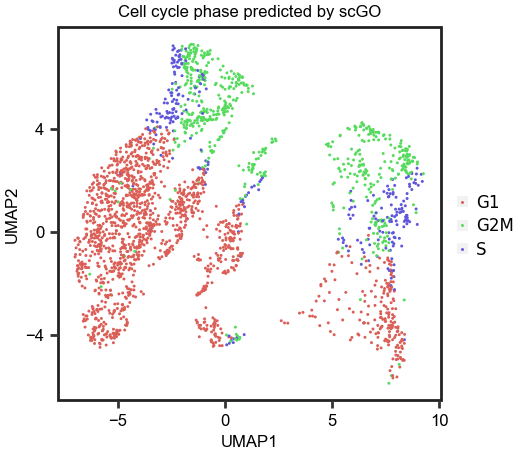

/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 2.6 x 2.3 in image.
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figure/senescence_phase_prediction.pdf


In [35]:
#umap of total dataset


from plotnine import *
import pandas as pd


black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
salmen = "#FA8072"
limegreen = '#32CD32'
deepskyblue = '#00AFEE'
c1="#F8766D"
c2="#00BA38"
c3="#619CFF"





embedding = data.obsm["X_umap"]

plot_data=pd.DataFrame(embedding,columns=["UMAP1","UMAP2"])

plot_data["phase"]=phase

plot_data=plot_data.iloc[test_indices]
plot_data["phase"]=predicted_celltype
#plot_data["score"]=score

p =(ggplot()
    + geom_point(plot_data, aes(x='UMAP1', y='UMAP2', color="phase"),size=0.001,stroke=0.3,alpha=1)
    #+ geom_point(data_not_indrop, aes(x='UMAP1', y='UMAP2',color="factor(Technology)"),size=0.001,alpha=1)
    +theme(
        figure_size=[2.6,2.3],
        axis_text=element_text(size=6,family="Arial",color="black"),
        axis_title_x=element_text(size=6,family="Arial",color="black"),
        axis_title_y=element_text(size=6,family="Arial",color="black"),
        plot_title=element_text(margin={'b': 1, 'r': 0, 'units': 'pt'},size=6,family="Arial",color="black",hjust=0.5),
        panel_background=element_rect(fill=gray, alpha=0),
        panel_grid_major=element_line(size=0.3, alpha=0.0,color=black),
        panel_grid_minor=element_line(size=0.3, alpha=0.0,color=black),
        panel_border=element_rect(color=black, size=1),
        legend_title = element_text(size=6,alpha=0), #change legend title font size
        legend_text = element_text(size=6),
        legend_background=element_rect(size=0.5,alpha=0),
        #legend_position=(0.75,0.9), 
        legend_direction='vertical',
        #legend_position='right',
        legend_key_size=4) #change legend text font size))
    #+scale_color_manual(values =[c1, c2, c3]) 
    #+geom_density_2d(colour = "#F8766D",size=0.2,data=data_U,alpha=0.5)
    #+geom_density_2d(colour = "#00BA38",size=0.2,data=data_psU,alpha=0.5)
    +ggtitle("Cell cycle phase predicted by scGO")
    #+scale_color_gradient(low=deepskyblue , high=yellow,mid=c2)
    #+scale_color_gradient(low=purple , high="yellow",mid=c2)
    #+scale_color_manual(values=['#66C2A4', '#B2DF8A', '#2CA25F'])  
    #+scale_color_manual(values=['#bfff7f', '#ffff7f', '#ffbf7f'])  
   )
#+ facet_wrap('G')
print(p)
p.save('figure/senescence_phase_prediction.pdf')


S 0.9905195056175827
G2M 0.9973548278633024
G1 0.9976977648103913


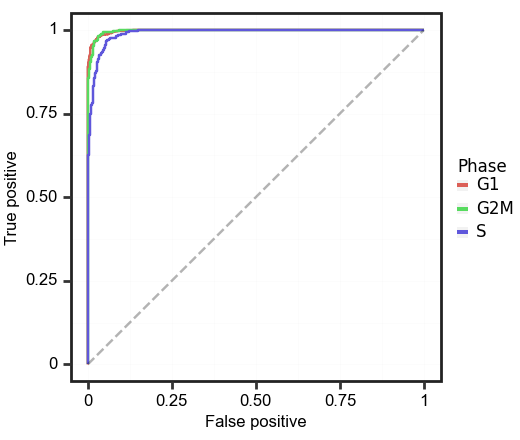


S 0.9456400208287487
G2M 0.9903070136028315
G1 0.9988453265622149


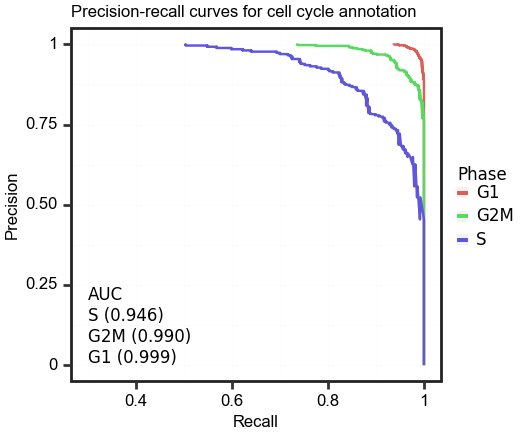

/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 2.6 x 2.2 in image.
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figure/senescence_cell_cycle_phase_PR.pdf


In [68]:
#ROC plot

from sklearn.metrics import roc_curve, auc,precision_recall_curve
from plotnine import *
import torch.nn.functional as F

y_prob=[]
y_test=[]
test_data=MyDataset(x_test,y_test_relabeled)
test_loader=DataLoader(test_data, batch_size=2000, shuffle=False)

for i, data in enumerate(test_loader,0):
    inputs, labels = data
        
    inputs=Variable(inputs).to(torch.float32)
    labels=Variable(labels).to(torch.long)
        
    outputs,_,_,_ = model(inputs)
    pred = list(torch.max(outputs, 1)[1].numpy())

    outputs  = F.softmax(outputs , dim=1)
    
    y_prob=outputs.detach().numpy() 
    y_test=labels.detach().numpy() 
    break


one_hot_code_dict={
    0:[1,0,0,0,0,0,0,0,0,0,0],
    1:[0,1,0,0,0,0,0,0,0,0,0],
    2:[0,0,1,0,0,0,0,0,0,0,0],
    3:[0,0,0,1,0,0,0,0,0,0,0],
    4:[0,0,0,0,1,0,0,0,0,0,0],
    5:[0,0,0,0,0,1,0,0,0,0,0],
    6:[0,0,0,0,0,0,1,0,0,0,0],
    7:[0,0,0,0,0,0,0,1,0,0,0],
    8:[0,0,0,0,0,0,0,0,1,0,0],
    9:[0,0,0,0,0,0,0,0,0,1,0],
    10:[0,0,0,0,0,0,0,0,0,0,1]
}

y_test=np.array([one_hot_code_dict[label] for label in y_test])

fprs=[]
tprs=[]

celltypes=[]

n_classes = y_prob.shape[1]  # Number of classes

roc_auc=[]
pr_auc=[]

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_prob[:, i])
    roc_auc.extend([auc(fpr,tpr)]*len(fpr))
    pr_auc.extend([auc(recall,precision)]*len(fpr))
    #print(fpr)
    fprs.extend(list(fpr))
    tprs.extend(list(tpr))
    
    celltypes.extend([label_dict_revese[i]]*len(fpr))

    print(label_dict_revese[i], auc(fpr,tpr))
    

black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
c1="#F8766D"
c2="#00BA38" 
c3="#619CFF"

data=pd.DataFrame(dict(fpr=fprs,tpr=tprs,celltypes=celltypes)) 
p = (ggplot()
        +geom_line(data,aes(x="fpr",y = "tpr",group="celltypes",color='celltypes'))
        +geom_line(pd.DataFrame(dict(x=[0,1],y=[0,1])),aes(x="x",y="y"),linetype="dashed",alpha=0.3)
        +theme(panel_background=element_rect(fill=gray, alpha=0),
            panel_grid_major=element_line(size=0.3, alpha=0.01,color=black),
            panel_grid_minor=element_line(size=0.3, alpha=0.01,color=black),
            panel_border=element_rect(color=black, size=1),
            axis_text=element_text(size=6,family="Arial",color="black"),
            axis_title_x=element_text(size=6,family="Arial",color="black"),
            axis_title_y=element_text(size=6,family="Arial",color="black"),
            plot_title=element_text(margin={'b': 1, 'r': 0, 'units': 'pt'},size=6,family="Arial",color="black"),
            figure_size=[2.6,2.2],
            legend_title = element_text(size=6), #change legend title font size
            legend_text = element_text(size=6),
            legend_background=element_rect(size=0.5,alpha=0),
            #legend_position=(1.5,0.4),
            legend_key_size=4) #change legend text font size
        +labs(x = "False positive", y ="True positive")
        +guides(color = guide_legend(title = "Phase"))
        #+ggtitle("Balanced training data")
)
print(p)
#p.save('figure/ROC_zheng68k_raw_training_data.pdf')



precisions=[]
recalls=[]
celltypes=[]
for i in range(n_classes):
    precision,recall,thersholds=precision_recall_curve(y_test[:, i], y_prob[:, i])
    precisions.extend(list(precision))
    recalls.extend(list(recall))
    celltypes.extend([label_dict_revese[i]]*len(precision))
    print(label_dict_revese[i], auc(recall,precision))
    
data=pd.DataFrame(dict(precision=precisions,recall=recalls,celltypes=celltypes)) 
p = (ggplot()
        
        +geom_line(data,aes(x="precision",y = "recall",group="celltypes",color='celltypes'))
        #+geom_line(pd.DataFrame(dict(x=[0,1],y=[0,1])),aes(x="x",y="y"),linetype="dashed",alpha=0.3)
        
        +theme(panel_background=element_rect(fill=gray, alpha=0),
            panel_grid_major=element_line(size=0.3, alpha=0.01,color=black),
            panel_grid_minor=element_line(size=0.3, alpha=0.01,color=black),
            panel_border=element_rect(color=black, size=1),
            axis_text=element_text(size=6,family="Arial",color="black"),
            axis_title_x=element_text(size=6,family="Arial",color="black"),
            axis_title_y=element_text(size=6,family="Arial",color="black"),
            plot_title=element_text(margin={'b': 1, 'r': 0, 'units': 'pt'},size=6,family="Arial",color="black"),
            figure_size=[2.6,2.2],
            legend_title = element_text(size=6), #change legend title font size
            legend_text = element_text(size=6),
            legend_background=element_rect(size=0.5,alpha=0),
            #legend_position=(1.5,0.4),
            legend_key_size=4) #change legend text font size
        +labs(x = "Recall", y ="Precision",title="Precision-recall curves for cell cycle annotation")
        +guides(color = guide_legend(title = "Phase"))
        #+ggtitle("Balanced training data")
        +annotate("text",x=0.3,y=0.12,label="AUC\nS (0.946)\nG2M (0.990) \nG1 (0.999)",ha="left",size=6,color="black")
)
print(p)
p.save('figure/senescence_cell_cycle_phase_PR.pdf')

In [ ]:
import copy

old_list = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
new_list = copy.copy(old_list)

print("Old list:", old_list)
print("New list:", new_list)

94849582832896
94849582832864
